1

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df['Customer_Segment'].unique()

array([1, 2, 3])

In [5]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [6]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
target_column = 'Customer_Segment'

X = df.drop(columns=target_column)
y = df[target_column]

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
pca = PCA()
pca.fit(X_scaled)

PCA()

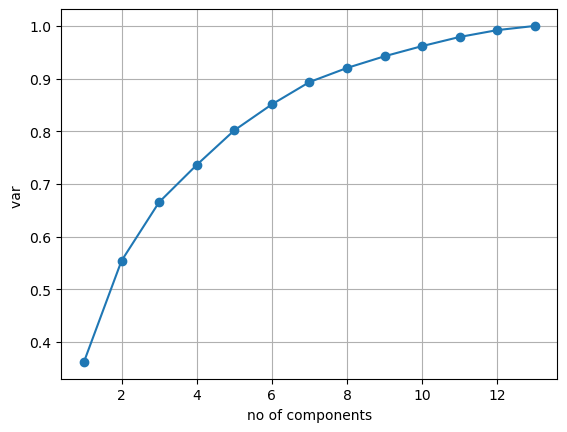

In [11]:
exp_var_ratio = pca.explained_variance_ratio_
cumulative_var = exp_var_ratio.cumsum()


plt.plot(range(1,len(cumulative_var)+1),cumulative_var,marker='o')
plt.xlabel('no of components')
plt.ylabel('var ')
plt.grid(True)

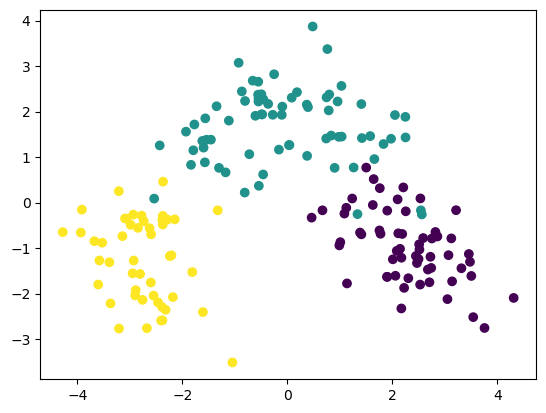

In [18]:
pca_new = PCA(n_components=8)
X_pca = pca_new.fit_transform(X_scaled)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)

In [95]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [96]:
classes = df['Species'].unique().tolist()
classes 
labels = [0,1,2]
df['Species'].replace(classes,labels,inplace=True)

In [97]:
df['Species'].unique()

array([0, 1, 2])

In [98]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [100]:
scaler = StandardScaler()
target_column = 'Species'

X = df.drop(columns=[target_column,'Id'])
y = df[target_column]

X_scaled = scaler.fit_transform(X)
X.shape

(150, 4)

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

In [102]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [103]:

y_pred = lda.predict(X_test)
accuracy_score(y_test,y_pred)



1.0

In [104]:
import numpy as np

In [105]:
sample = [3.0,2.3,5.5,0.7]

sample = scaler.transform(np.array([sample]))

sample_pred = lda.predict(sample)

classes[sample_pred.tolist()[0]]

/home/leosama/anaconda3/envs/timeseries/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Iris-virginica'

2

In [2]:
import pandas as pd

In [3]:
uber_df = pd.read_csv('uber.csv')
uber_df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
uber_df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
uber_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
uber_df.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
uber_df.dropna(inplace=True)

In [8]:
lat_to_km = 111
long_to_km = 85

uber_df['manhatten_distance'] = (uber_df['pickup_latitude'] - uber_df['dropoff_latitude']).abs() * lat_to_km + (uber_df['pickup_longitude'] - uber_df['dropoff_longitude']).abs() * long_to_km

In [9]:
uber_df['key'] = pd.to_datetime(uber_df['key'])
uber_df['weekday'] = uber_df['key'].dt.weekday
uber_df['hour'] = uber_df['key'].dt.hour

In [10]:
uber_df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,manhatten_distance,weekday,hour
0,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.706116,3,19
1,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.483275,4,20
2,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,7.148977,0,21
3,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2.306735,4,8
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,5.989997,3,17


In [11]:
uber_df.shape

(199999, 11)

In [12]:
uber_df.describe()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,manhatten_distance,weekday,hour
count,199999,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2012-03-22 14:58:56.889214720,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,31.054609,3.048435,13.491387
min,2009-01-01 01:15:22.000000600,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000,0.000000
25%,2010-08-25 08:19:54,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.554543,1.000000,9.000000
50%,2012-03-21 20:44:25,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.728282,3.000000,14.000000
75%,2013-10-19 02:21:09.000000512,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,5.004448,5.000000,19.000000
max,2015-06-30 23:40:39.000000100,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,334487.284561,6.000000,23.000000
std,NaN,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,1118.641750,1.946946,6.515505


In [13]:
uber_df = uber_df[uber_df['fare_amount']>0]
uber_df.shape

(199977, 11)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

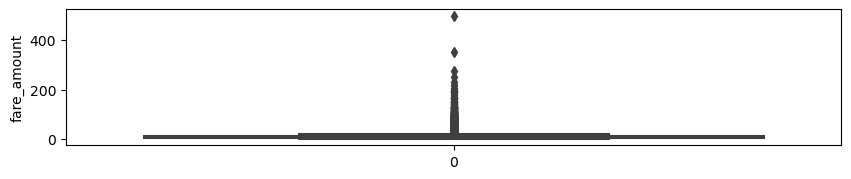

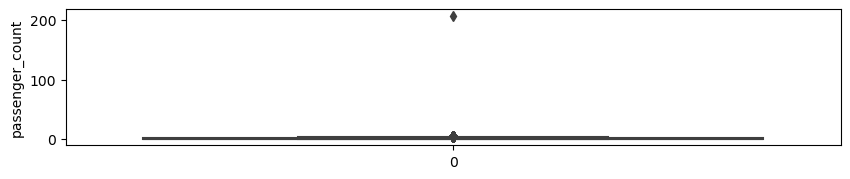

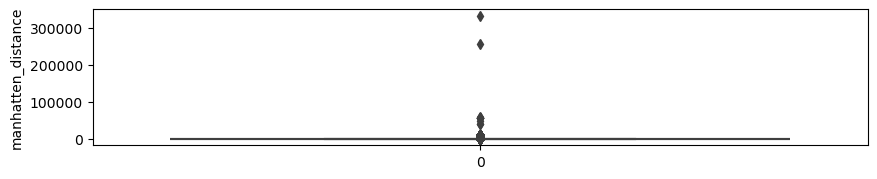

In [15]:
def uber_boxplot(df_column):

    plt.figure(figsize=(10,6))
    plt.subplot(3,1,1)
    sns.boxplot(uber_df[df_column])
    plt.ylabel(df_column)

    plt.show()


for i in ['fare_amount','passenger_count','manhatten_distance']:
    uber_boxplot(i)

In [16]:
uber_df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'manhatten_distance', 'weekday', 'hour'],
      dtype='object')

In [17]:
columns_needed = ['fare_amount','passenger_count','manhatten_distance']

In [18]:
def remove_outliers(df,columns):

    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        fil_df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

    return fil_df

In [19]:
filtered_df = remove_outliers(uber_df,columns_needed)
filtered_df.shape

(183982, 11)

In [20]:
X = filtered_df[['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'manhatten_distance', 'weekday', 'hour']]

y = filtered_df['fare_amount']

In [21]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

y_pred = linear_model.predict(X_test)

print(mean_squared_error(y_test,y_pred))
mean_absolute_error(y_test,y_pred)

22.530479425308293


2.2875965685361126

In [33]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train,y_train)

y_pred = ridge_model.predict(X_test)

print(mean_squared_error(y_test,y_pred))
mean_absolute_error(y_test,y_pred)

22.548264942449734


2.2881006647554

In [34]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train,y_train)

y_pred = lasso_model.predict(X_test)

print(mean_squared_error(y_test,y_pred))
mean_absolute_error(y_test,y_pred)

24.720726123351046


2.5878155749633356

2.2

In [1]:
import pandas as pd

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
columns = diabetes_df.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
def univ_analysis(df,columns):

    results = {}

    for col in columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mean()
        variance = df[col].var()
        std_dev = df[col].std()
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()

        results[col] = {'mean':mean,
                        'median':median,
                        'mode':mode,
                        'variance':variance,
                        'standard deviation':std_dev,
                        'skewness':skewness,
                        'kurtosis':kurtosis}
        

    return pd.DataFrame(results)


In [5]:
univ_analysis(diabetes_df,columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
median,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
mode,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
variance,11.354056,1022.248314,374.647271,254.473245,13281.180078,62.159984,0.109779,138.303046,0.227483
standard deviation,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
skewness,0.901674,0.173754,-1.843608,0.109372,2.272251,-0.428982,1.919911,1.129597,0.635017
kurtosis,0.159220,0.640780,5.180157,-0.520072,7.214260,3.290443,5.594954,0.643159,-1.600930


In [6]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes_df.shape

(768, 9)

In [18]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
columns = columns[:-1]


In [10]:
def remove_outliers(df,columns):

    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        fil_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return fil_df

In [11]:
filtered_df = remove_outliers(diabetes_df,columns)
filtered_df.shape

(759, 9)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_absolute_error,r2_score,accuracy_score

In [13]:
X = filtered_df.drop(columns='Outcome')
y = filtered_df['Outcome']

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [15]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

y_pred = linear_model.predict(X_test)

mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred)



(0.328456071879526, 0.3393773212855098)

In [16]:
log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train,y_train)

y_pred = log_model.predict(X_test)

accuracy_score(y_test,y_pred)

0.7807017543859649

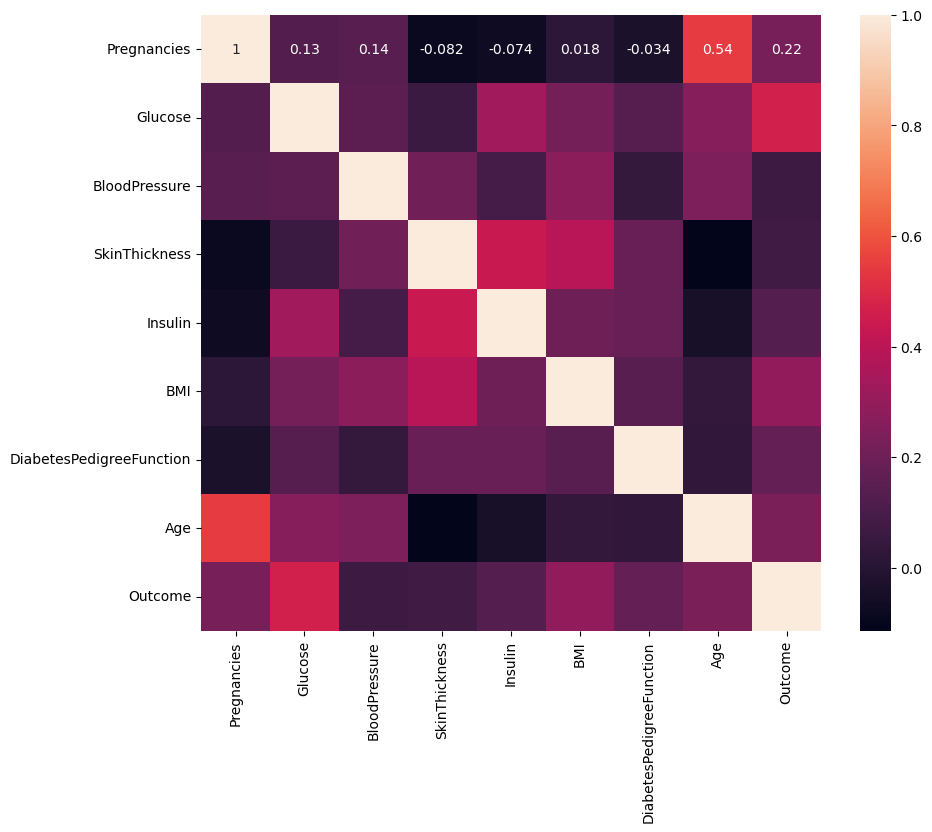

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = diabetes_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

3

In [35]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets


In [36]:
digits = datasets.load_digits()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = digits.data
y = digits.target

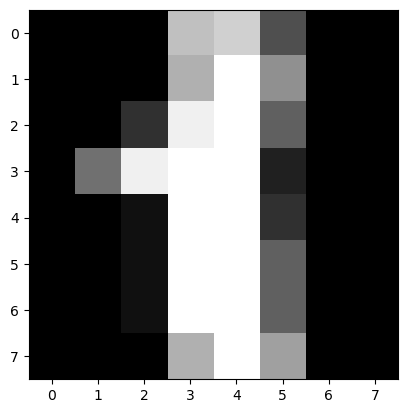

In [38]:
plt.imshow(digits.images[1],cmap='gray')

In [39]:
X[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [40]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

In [46]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay


svm = SVC(kernel='rbf')

svm.fit(X_train,y_train)

SVC()

In [47]:
y_pred = svm.predict(X_test)

accuracy_score(y_test,y_pred)

0.9796296296296296

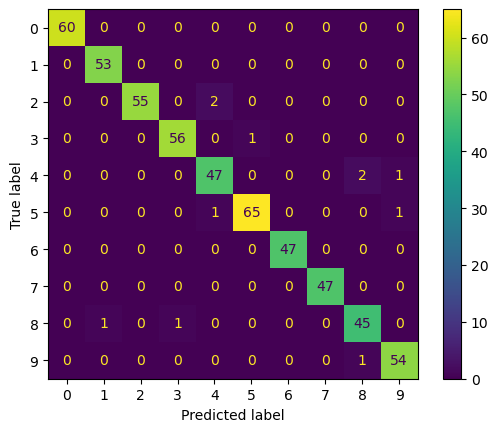

In [48]:
cm = confusion_matrix(y_test,y_pred)

c_mat = ConfusionMatrixDisplay(cm)
c_mat.plot()

3.2

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [68]:
social_df = pd.read_csv('Social_Network_Ads.csv')


In [69]:
social_df.drop(columns='User ID',inplace=True)
social_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [70]:
classes = ['Male','Female']
labels = [0,1]

social_df['Gender'].replace(classes,labels,inplace=True)
social_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [71]:
social_df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [72]:
import seaborn as sns

<Axes: >

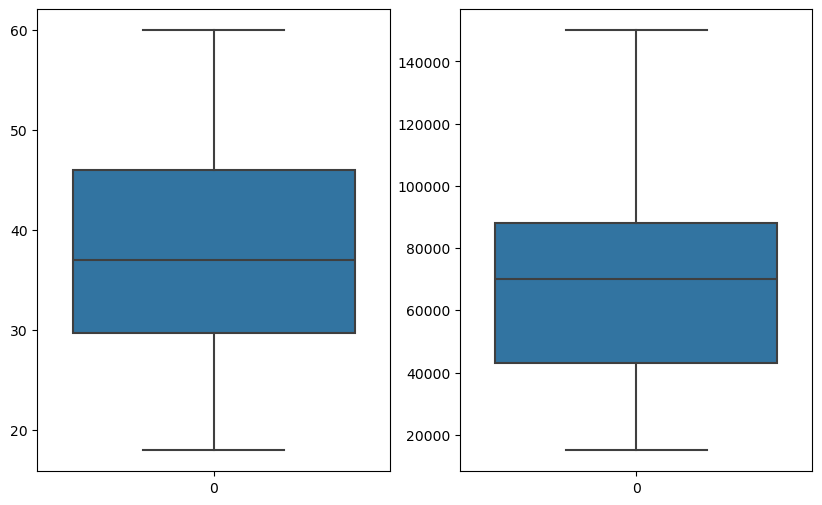

In [73]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(social_df['Age'])

plt.subplot(1,2,2)
sns.boxplot(social_df['EstimatedSalary'])




In [74]:
X = social_df.drop(columns='Purchased')
y = social_df['Purchased']

In [75]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [80]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

param_grid = {
    'n_neighbors': range(1, 20),
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn,param_grid,cv=5)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 20)})

In [84]:
best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

acc = accuracy_score(y_test,y_pred)

print(acc)
print(1-acc)

0.9
0.09999999999999998


In [85]:
precision_score(y_test,y_pred) , recall_score(y_test,y_pred)

(0.8409090909090909, 0.8809523809523809)

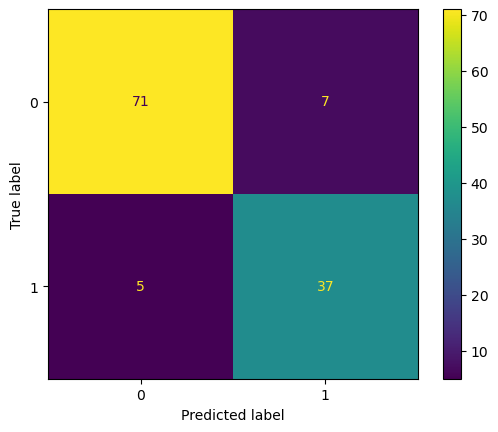

In [81]:
cm = confusion_matrix(y_test,y_pred)
c_mat = ConfusionMatrixDisplay(cm)
c_mat.plot()

4

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [39]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
X = iris_df.drop(columns=['Id','Species'])
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
columns = X.columns
columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [42]:
def remove_outliers(df,columns):

    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        fil_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return fil_df

In [43]:
filtered_df = remove_outliers(X,columns)
filtered_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:2]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673,  0.18870735],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673,  0.18870735]])

In [45]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

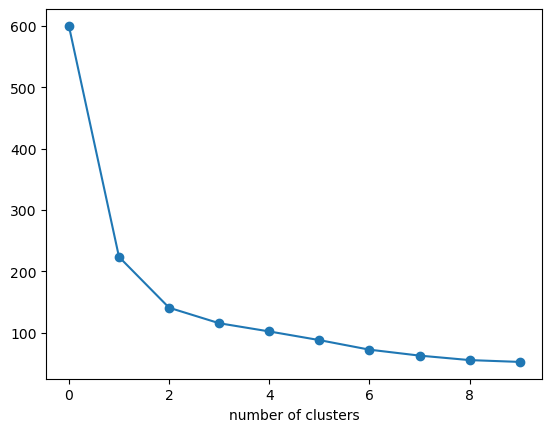

In [46]:
plt.plot(wcss,marker='o')
plt.xlabel('number of clusters')
plt.show()

In [65]:
best_kmeans = KMeans(n_clusters=4)
clusters = best_kmeans.fit_predict(X_scaled)
X['cluster_labels'] = clusters

In [66]:
import seaborn as sns

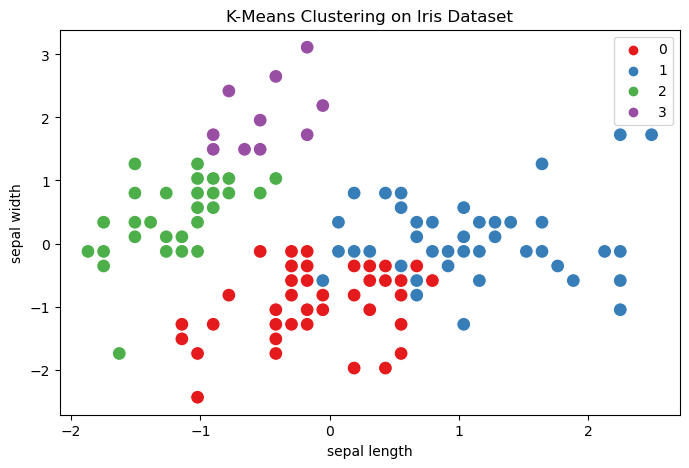

In [67]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=X['cluster_labels'],palette='Set1',s=100)
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()


4.2

In [26]:
import pandas as pd
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt


credit_df = pd.read_csv('CC GENERAL.csv')
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [27]:
credit_df.drop(columns='CUST_ID',inplace=True)

In [28]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [29]:
credit_df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [30]:
credit_df['MINIMUM_PAYMENTS'].fillna(credit_df['MINIMUM_PAYMENTS'].mean(),inplace=True)
credit_df.dropna(inplace=True)
credit_df.shape

(8949, 17)

In [31]:
columns = credit_df.columns
columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [32]:
def remove_outliers(df,columns):

    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        fil_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return fil_df

In [ ]:
filtered_df = remove_outliers(credit_df,columns)
filtered_df.shape

(7584, 17)

In [62]:
filtered_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(filtered_df)



(7584, 18)

In [46]:

from sklearn.metrics import silhouette_score
sil_scores = []

k = range(2,11)

for i in k :
    kmedoids = KMedoids(n_clusters=i)
    cluster_labels = kmedoids.fit_predict(X_scaled)

    score = silhouette_score(X_scaled,cluster_labels)

    sil_scores.append(score)

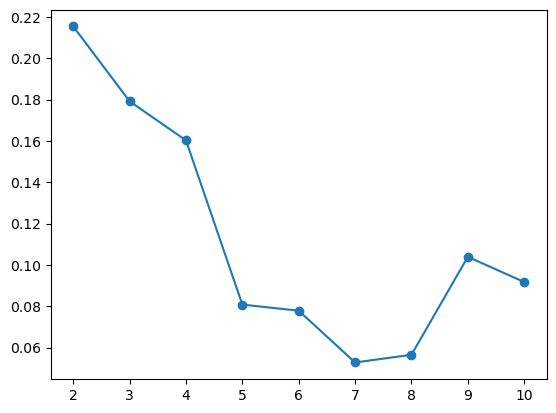

In [47]:
plt.plot(k,sil_scores,marker='o')

In [50]:
best_kmeoids = KMedoids(n_clusters=2)
clusters = best_kmeoids.fit_predict(X_scaled)

filtered_df['clusters'] = clusters


/tmp/ipykernel_33468/866750230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['clusters'] = clusters


<Axes: >

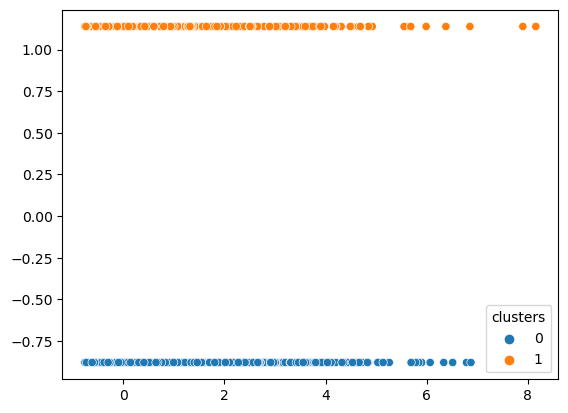

In [63]:
import seaborn as sns
sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,-1],hue=filtered_df['clusters'])

5

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [27]:
car_df = pd.read_csv('car_evaluation.csv')
car_df.columns = ['buying_price','maintenance_cost','number_of_doors','number_of_persons','lug_boot','safety','decision']
car_df.head()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [28]:
car_df.shape

(1727, 7)

In [45]:
columns = car_df.columns
columns

Index(['buying_price', 'maintenance_cost', 'number_of_doors',
       'number_of_persons', 'lug_boot', 'safety', 'decision'],
      dtype='object')

In [30]:
def unique_values(df,columns):

    results = {}
    for col in columns:
        results[col] = df[col].unique()


    return results

In [31]:
unique_values(car_df,columns)

{'buying_price': array(['vhigh', 'high', 'med', 'low'], dtype=object),
 'maintenance_cost': array(['vhigh', 'high', 'med', 'low'], dtype=object),
 'number_of_doors': array(['2', '3', '4', '5more'], dtype=object),
 'number_of_persons': array(['2', '4', 'more'], dtype=object),
 'lug_boot': array(['small', 'med', 'big'], dtype=object),
 'safety': array(['med', 'high', 'low'], dtype=object),
 'decision': array(['unacc', 'acc', 'vgood', 'good'], dtype=object)}

In [33]:
label_encoder = LabelEncoder()

for col in columns:
    car_df[col] = label_encoder.fit_transform(car_df[col])

In [34]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   buying_price       1727 non-null   int64
 1   maintenance_cost   1727 non-null   int64
 2   number_of_doors    1727 non-null   int64
 3   number_of_persons  1727 non-null   int64
 4   lug_boot           1727 non-null   int64
 5   safety             1727 non-null   int64
 6   decision           1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [41]:
car_df.head()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [42]:
target_column  = 'decision'

X = car_df.drop(columns=target_column)
y = car_df[target_column]

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [44]:
model = RandomForestClassifier(n_estimators=10000)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)

0.9691714836223507

5.2

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,r2_score,precision_score

from xgboost import XGBClassifier

In [66]:
iris_df = pd.read_csv('Iris.csv')
iris_df.drop(columns='Id',inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
classes = iris_df['Species'].unique().tolist()
label = [0,1,2]

In [70]:
iris_df['Species'].replace(classes,label,inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [71]:
X = iris_df.drop(columns='Species')
y = iris_df['Species']

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

ada_model = AdaBoostClassifier(n_estimators=200)
ada_model.fit(X_train,y_train)


y_pred = ada_model.predict(X_test)

accuracy_score(y_test,y_pred)

/home/leosama/anaconda3/envs/timeseries/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8888888888888888

In [74]:
gra_model = GradientBoostingClassifier(n_estimators=200)

gra_model.fit(X_train,y_train)

y_pred = gra_model.predict(X_test)

accuracy_score(y_test,y_pred)

0.9555555555555556

In [75]:
xg_model = XGBClassifier(n_estimators=200)

xg_model.fit(X_train,y_train)

y_pred = xg_model.predict(X_test)

accuracy_score(y_test,y_pred)

0.9333333333333333

6

In [ ]:
import numpy as np
import random

# Define the maze environment
maze = np.array([
    [0, 0, 0, 0, 1],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])

# Parameters
start = (0, 0)
goal = (4, 4)
actions = ["up", "down", "left", "right"]
action_dict = {"up": (-1, 0), "down": (1, 0), "left": (0, -1), "right": (0, 1)}

# Hyperparameters
alpha = 0.1      # Learning rate
gamma = 0.9      # Discount factor
epsilon = 0.1    # Exploration rate
episodes = 5000

# Q-table initialization
q_table = np.zeros((maze.shape[0], maze.shape[1], len(actions)))

# Helper functions
def is_valid_move(state):
    x, y = state
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1] and maze[x, y] == 0

def get_next_state(state, action):
    x, y = state
    dx, dy = action_dict[action]
    next_state = (x + dx, y + dy)
    return next_state if is_valid_move(next_state) else state

def get_reward(state):
    return 100 if state == goal else -1

# Training loop
for episode in range(episodes):
    state = start
    done = False
    while not done:
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action_index = random.choice(range(len(actions)))  # Explore
        else:
            action_index = np.argmax(q_table[state[0], state[1]])  # Exploit
        action = actions[action_index]
        
        # Take action and observe result
        next_state = get_next_state(state, action)
        reward = get_reward(next_state)
        
        # Update Q-value using the Q-learning formula
        best_next_action = np.argmax(q_table[next_state[0], next_state[1]])
        q_table[state[0], state[1], action_index] += alpha * (
            reward + gamma * q_table[next_state[0], next_state[1], best_next_action] -
            q_table[state[0], state[1], action_index]
        )
        
        # Transition to the next state
        state = next_state
        
        # Check if goal is reached
        if state == goal:
            done = True

# Print the Q-values for each state
print("Q-Table after training:")
print(q_table)

# Test the agent
def test_agent(start):
    state = start
    path = [state]
    while state != goal:
        action_index = np.argmax(q_table[state[0], state[1]])
        action = actions[action_index]
        state = get_next_state(state, action)
        path.append(state)
    return path

# Display path
print("Path taken by the agent from start to goal:")
print(test_agent(start))
